Support Vector Machine

Supervised Learning method-
*  Used when number of dimensions are greater than number of samples
*  Useful for handling outliers & also for classification & regression problems



Importing Libraries

In [630]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [631]:
loan_data=pd.read_excel('/content/loan.xlsx')                                    # Read the loan excel file
print(loan_data.shape)                                                           # displaying information of data 
print(loan_data.info())                                                 
loan_data.head()


(429, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              429 non-null    object 
 1   Age              429 non-null    float64
 2   Time_at_address  429 non-null    float64
 3   Res_status       429 non-null    object 
 4   Telephone        429 non-null    object 
 5   Occupation       429 non-null    object 
 6   Job_status       429 non-null    object 
 7   Time_employed    429 non-null    int64  
 8   Time_bank        429 non-null    int64  
 9   Liab_ref         429 non-null    object 
 10  Acc_ref          429 non-null    object 
 11  Home_Expn        429 non-null    int64  
 12  Balance          429 non-null    int64  
 13  Decision         429 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 47.0+ KB
None


,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [632]:
correlation=loan_data.corr()                                                      #checking correlation among the columns in the data
print(correlation)

                      Age  Time_at_address  Time_employed  Time_bank  \
Age              1.000000         0.217342       0.426890   0.208736   
Time_at_address  0.217342         1.000000       0.278849   0.202083   
Time_employed    0.426890         0.278849       1.000000   0.291542   
Time_bank        0.208736         0.202083       0.291542   1.000000   
Home_Expn       -0.072254        -0.267470      -0.110933  -0.111761   
Balance          0.101819         0.072235       0.112719   0.153435   

                 Home_Expn   Balance  
Age              -0.072254  0.101819  
Time_at_address  -0.267470  0.072235  
Time_employed    -0.110933  0.112719  
Time_bank        -0.111761  0.153435  
Home_Expn         1.000000  0.080366  
Balance           0.080366  1.000000  


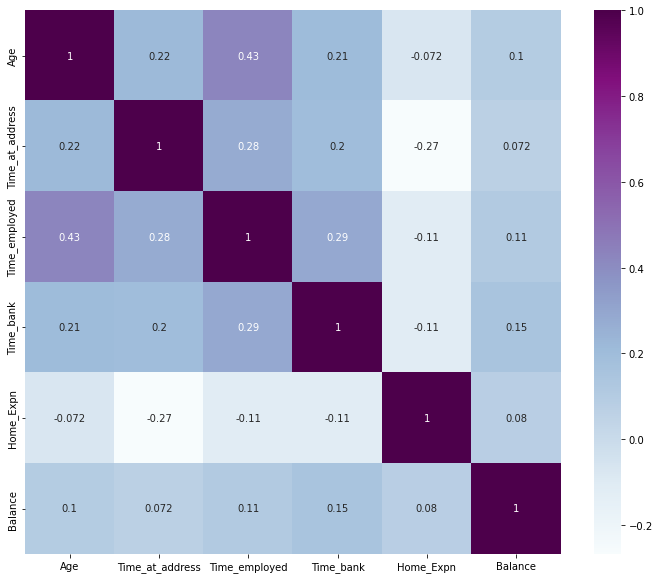

In [633]:
plt.figure(figsize=(12,10))                                                      # plotting the correlation matrix
sns.heatmap(correlation,annot=True,cmap='BuPu')

In [634]:
X=loan_data.iloc[:,:-1]                                                          #Specifying the inputs for the model
X

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200
427,M,21.000000,4.790,rent,not_given,productio,private_s,2,1,t,given,80,300


In [635]:
y=loan_data.iloc[:,-1]
y

0      reject
1      reject
2      accept
3      accept
4      reject
        ...  
424    reject
425    reject
426    accept
427    accept
428    reject
Name: Decision, Length: 429, dtype: object

Performing One Hot Encoding

In [636]:
X=pd.get_dummies(X)                                                              

In [637]:
X

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0
425,22.250000,1.250,3,0,280,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,0
426,23.330000,1.500,1,0,422,200,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
427,21.000000,4.790,2,1,80,300,0,1,0,1,...,0,1,0,0,0,0,0,1,1,0


Performing Label Encoding on Target variable

In [638]:
le=LabelEncoder()                                   
y=pd.DataFrame(le.fit_transform(y),columns=['Decision'])

In [639]:
y

,Decision
0,1
1,1
2,0
3,0
4,1
...,...
424,1
425,1
426,0
427,0


COncatenated the encoded data back into a dataframe

In [640]:
encoded_data=pd.concat([X,y],axis=1)
encoded_data

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_,Decision
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,1,1,0,1,0,1
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,1
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,0,1,1,0,...,0,0,1,0,0,0,1,1,0,1
425,22.250000,1.250,3,0,280,0,1,0,0,1,...,0,0,0,0,1,1,0,1,0,1
426,23.330000,1.500,1,0,422,200,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
427,21.000000,4.790,2,1,80,300,0,1,0,1,...,1,0,0,0,0,0,1,1,0,0


In [641]:
encoded_data.shape

(429, 36)

Splitting the Train & Test Data 

In [642]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=42,shuffle=True)

In [643]:
print(X_train.shape)
print(X_test.shape)

(214, 35)
(215, 35)



#  **Scaling the data**
Between -1 to 1


In [644]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)                                                 
X_test=sc.fit_transform(X_test)

In [645]:
model=svm.SVC(kernel='linear', C=0.1)
model.fit(X_train,y_train)                                                       # Fit the SVM model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear')

In [646]:
y_pred=model.predict(X_test)                                                      #predicting the test results

In [647]:
model.support_vectors_                                                            #displaying the support vectors

array([[-0.48402852, -0.72833075, -0.24644027, ...,  1.11921025,
         0.3385016 , -0.3385016 ],
       [-0.14937993,  0.21718043,  0.06562019, ...,  1.11921025,
         0.3385016 , -0.3385016 ],
       [-0.76262346, -0.5993974 ,  0.37768066, ..., -0.89348717,
         0.3385016 , -0.3385016 ],
       ...,
       [ 3.12766618,  1.03486028,  0.68974112, ..., -0.89348717,
         0.3385016 , -0.3385016 ],
       [-0.45642002,  1.9164558 , -0.55850074, ...,  1.11921025,
         0.3385016 , -0.3385016 ],
       [ 2.11619114, -0.87489601, -0.24644027, ...,  1.11921025,
         0.3385016 , -0.3385016 ]])

In [648]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 61,  33],
       [ 18, 103]])

In [649]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7627906976744186

Kernel polynomial


In [878]:
model=svm.SVC(kernel='poly', degree=3)                                             # Fit the SVM model
model.fit(X_train,y_train)       
y_pred=model.predict(X_test)                                                      #predicting the test results                                               

In [879]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[[357  15]
 [  1 377]]
0.9786666666666667


In [882]:
model=svm.SVC(C=10,kernel='rbf', gamma=0.01)                                            # Fit the SVM model
model.fit(X_train,y_train)       
y_pred=model.predict(X_test)                                                      #predicting the test results                                               

In [883]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[[354  18]
 [  4 374]]
0.9706666666666667


# Another part of Question 
Implementing SVM on random data based on SupportVector2.R file


In [736]:
df={'X1':[.5,1,1,2,3,3.5,1,3.5,4,5,5.5,6],'X2':[3.5,1,2.5,2,4,1.2,5.8,3,4,5,4,1],'Y':[1,1,1,1,1,1,-1,-1,-1,-1,-1,-1]}       # creating a dictionary of columns & values

In [737]:
data_1=pd.DataFrame(df)                                                            # Storing the dict as DataFrame
data_1.head()

,X1,X2,Y
0,0.5,3.5,1
1,1.0,1.0,1
2,1.0,2.5,1
3,2.0,2.0,1
4,3.0,4.0,1


In [738]:
X=data_1.iloc[:,:-1]
X.head()

,X1,X2
0,0.5,3.5
1,1.0,1.0
2,1.0,2.5
3,2.0,2.0
4,3.0,4.0


In [739]:
y=data_1.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Y, dtype: int64

Visualizing the data

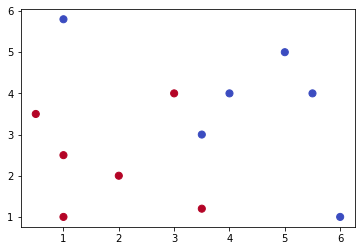

In [740]:
from matplotlib import pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y,s=50,cmap='coolwarm')

In [741]:
from sklearn.svm import SVC
import numpy as np

Splitting the data


In [742]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,train_size=0.75,shuffle=True)

Kernel Linear

In [784]:
model=SVC(C=1,kernel='linear')
model.fit(X_train1,y_train1)

SVC(C=1, kernel='linear')

In [785]:
print(model.predict([[-0.9, -1]]))
y_pred_linear=model.predict(X_test1)
y_pred_linear

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([-1,  1,  1])

In [786]:
model.support_vectors_                                                              #Printing the values for support vectors

array([[3.5, 3. ],
       [4. , 4. ],
       [3.5, 1.2],
       [3. , 4. ]])

In [787]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test1,y_pred_linear)                                         # Confusion Matrix
print("Confusion Matrix\n",cm)
accuracy=accuracy_score(y_test1,y_pred_linear)                                     # Accuracy score 
print("Accuracy",accuracy)

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


Plotting the results

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


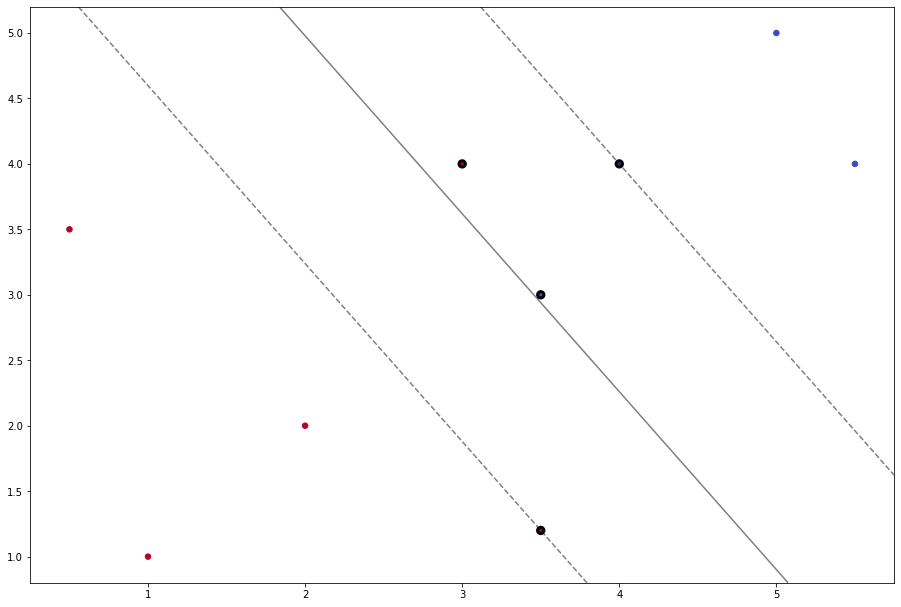

In [788]:
ax = plt.gca()
plt.scatter(X_train1.iloc[:, 0], X_train1.iloc[:, 1], c=y_train1, s=30, cmap='coolwarm')
xlim = ax.get_xlim()                                                              
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,                   #plotting the hyperplane & margin
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=40,
           linewidth=3, facecolors='none', edgecolors='k')
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
plt.show()

Kernel RBF

In [840]:
model=SVC(C= 1000, gamma= 0.01,kernel='rbf')
model.fit(X_train1,y_train1)

SVC(C=1000, gamma=0.01)

In [841]:
model.support_vectors_

array([[3.5, 3. ],
       [3.5, 1.2],
       [3. , 4. ]])

In [842]:
y_pred_rbf=model.predict(X_test1)                                                        
y_pred_rbf

array([-1,  1,  1])

In [843]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test1,y_pred_rbf)
print("Confusion Matrix\n",cm)
accuracy=accuracy_score(y_test1,y_pred_rbf)
print("Accuracy",accuracy)

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


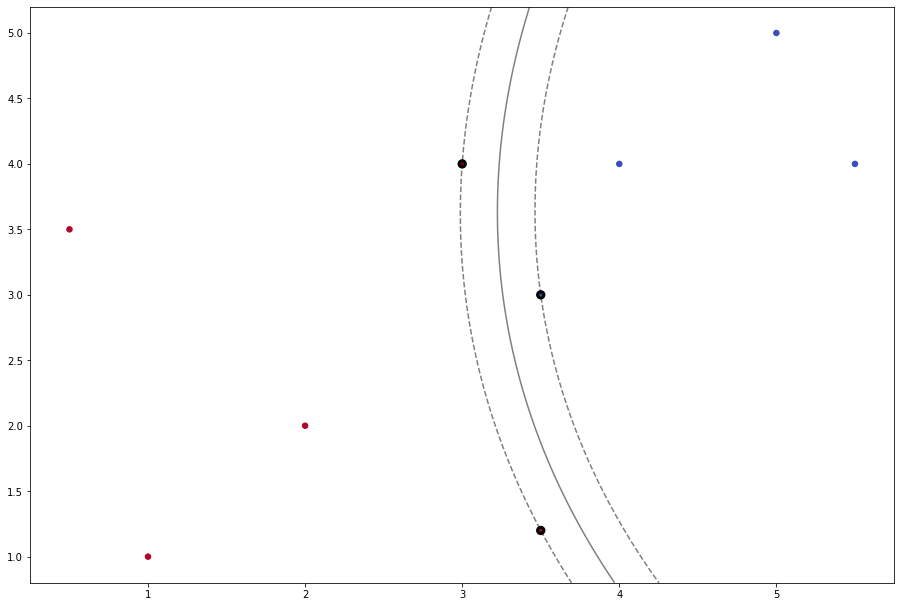

In [844]:
ax = plt.gca()
plt.scatter(X_train1.iloc[:, 0], X_train1.iloc[:, 1], c=y_train1, s=30, cmap='coolwarm')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=40,
           linewidth=3, facecolors='none', edgecolors='k')
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
plt.show()

Kernel Polynomial

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


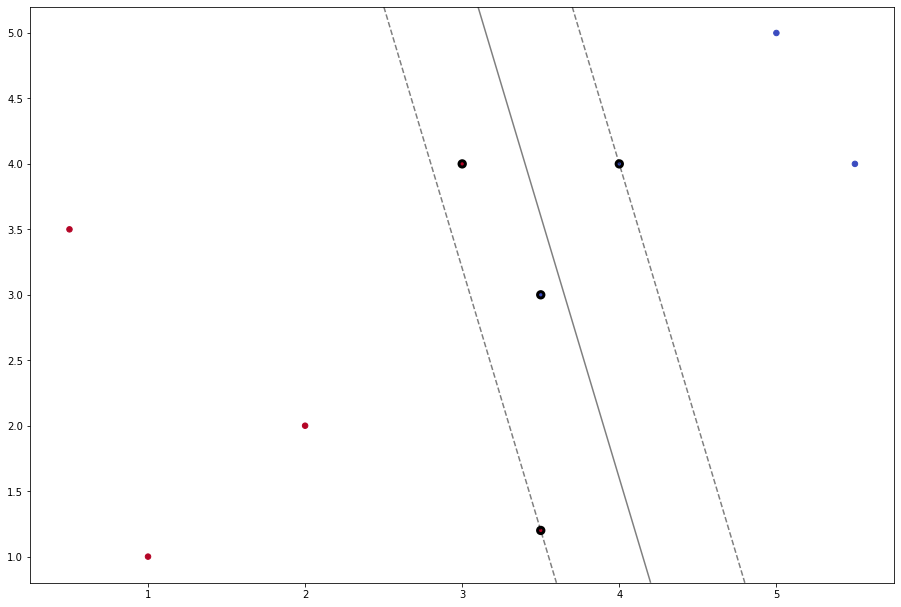

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


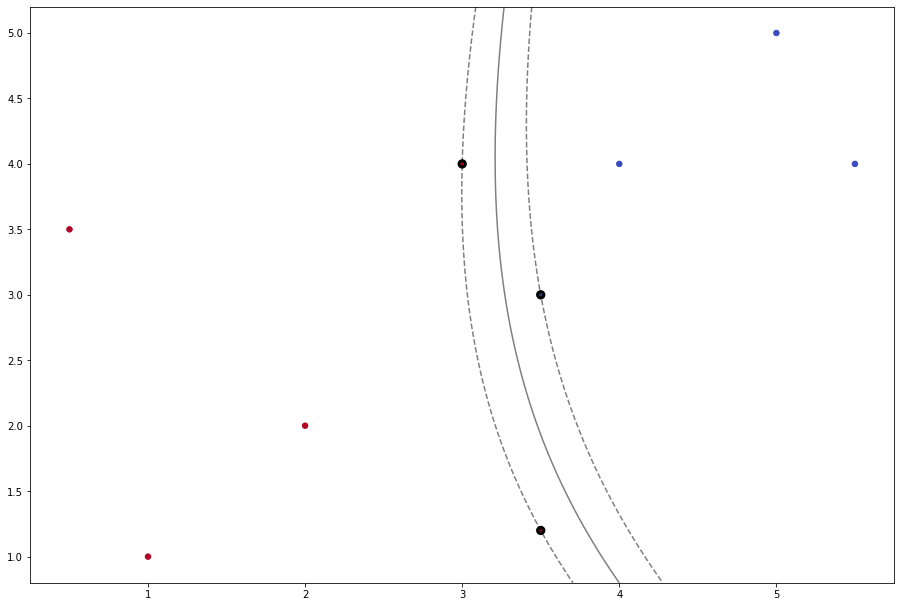

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


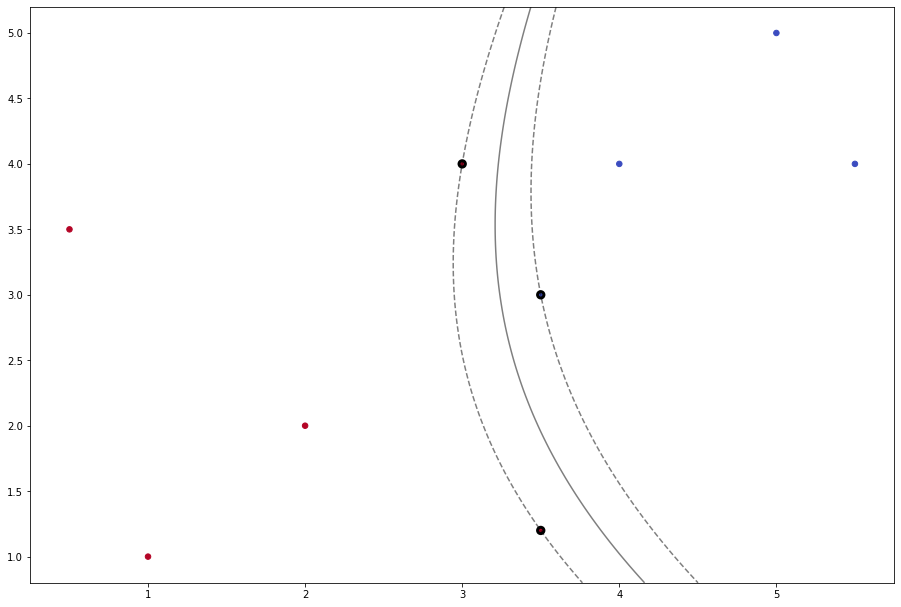

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


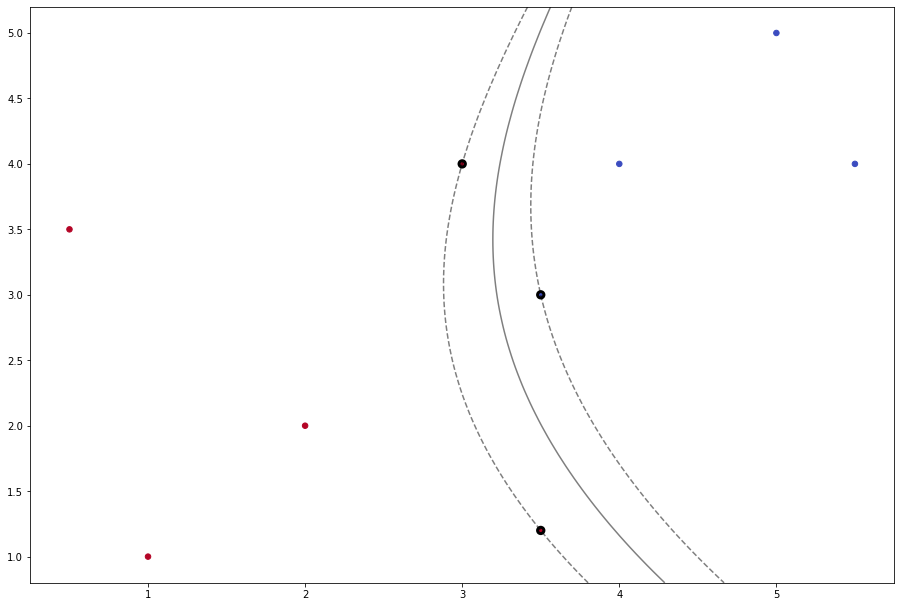

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


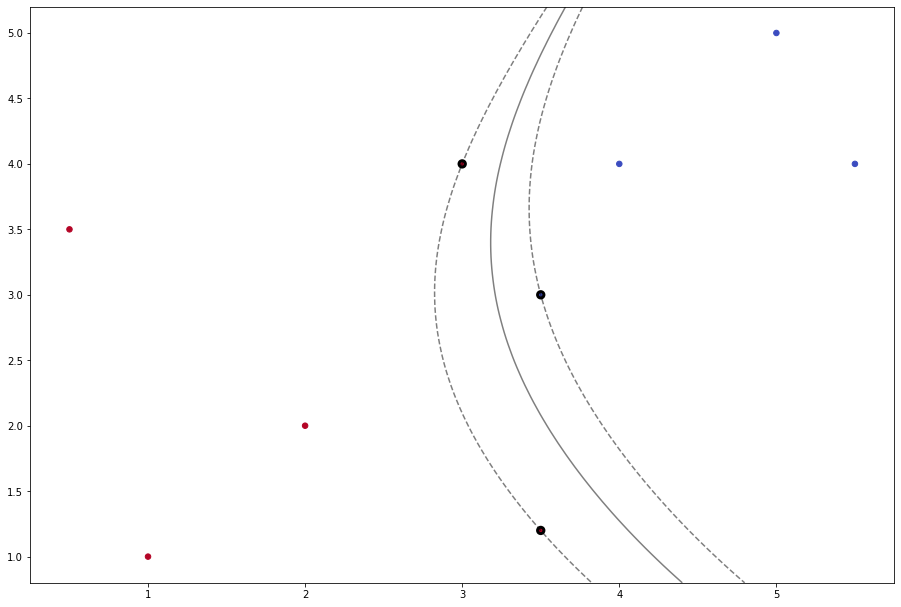

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


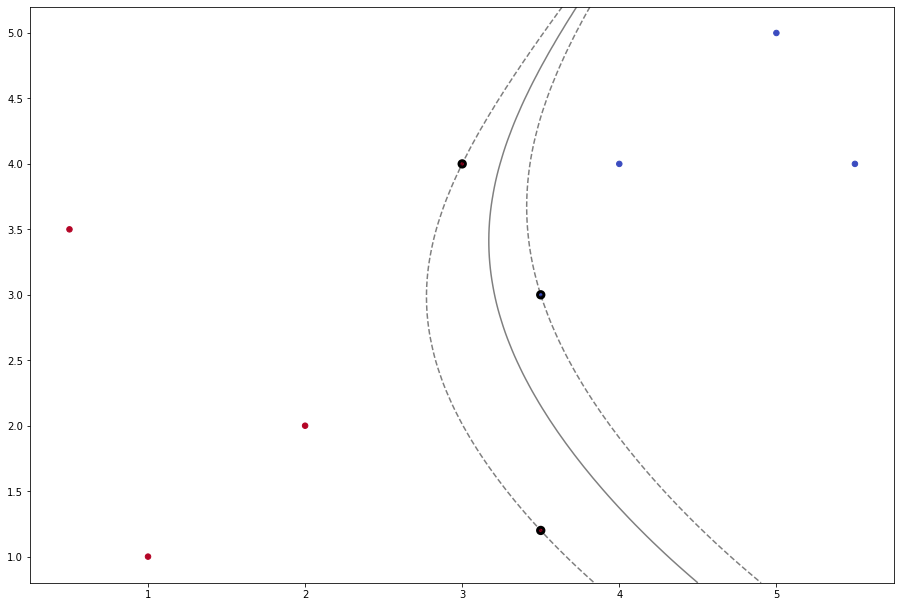

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


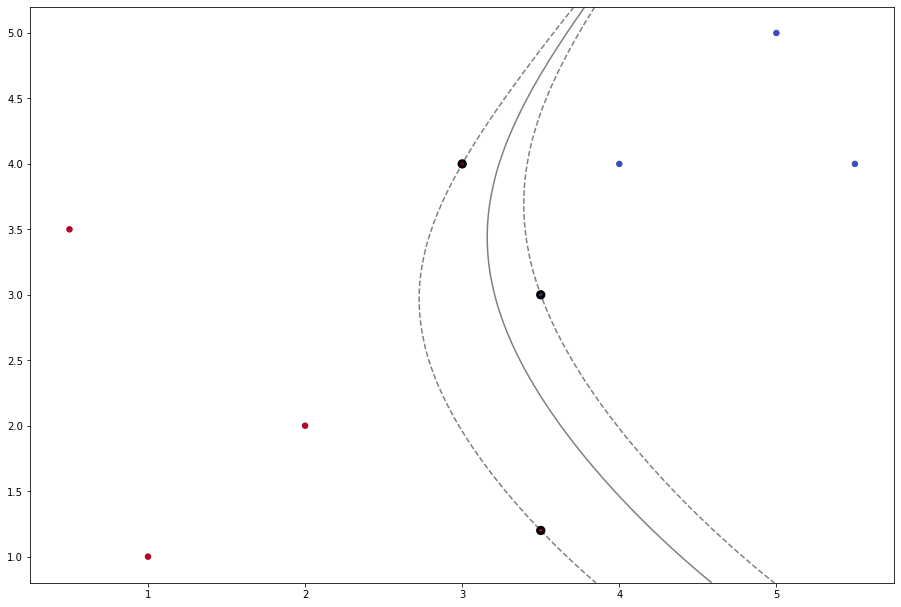

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


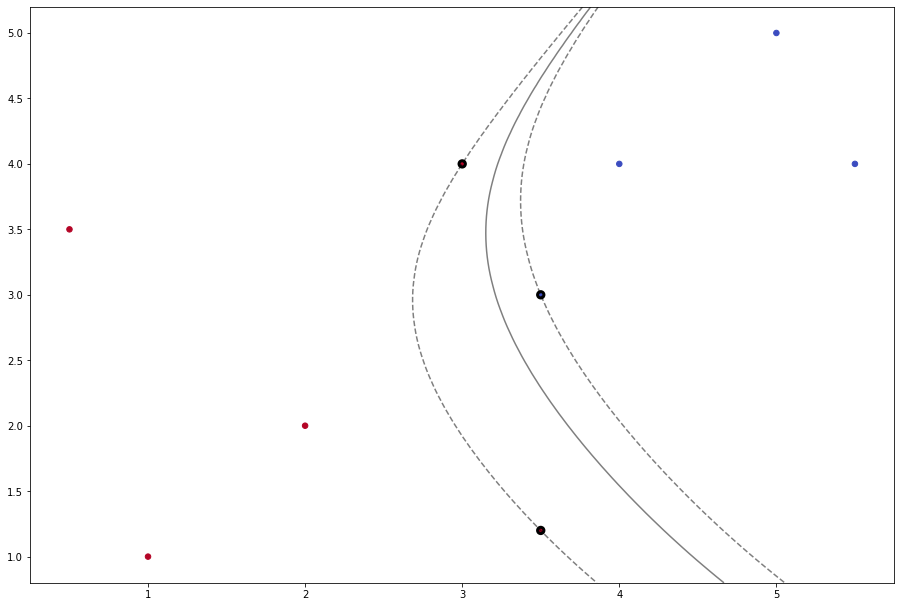

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


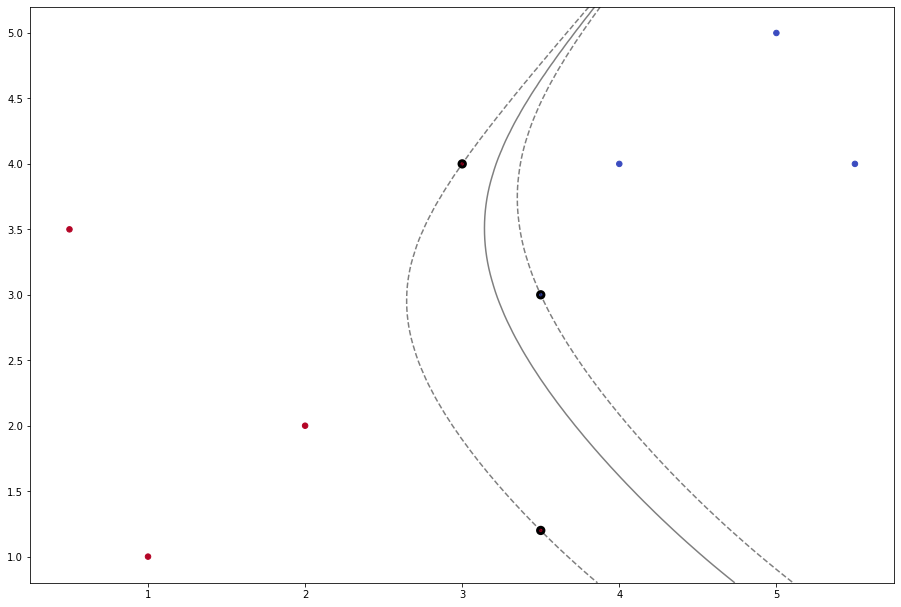

In [846]:
for i in range(1,10):
  model_poly=SVC(C=10,kernel='poly',degree=i)
  model_poly.fit(X_train1,y_train1)
  model_poly.support_vectors_
  y_pred_poly=model_poly.predict(X_test1)
  from sklearn.metrics import accuracy_score, confusion_matrix
  cm=confusion_matrix(y_test1,y_pred_poly)
  print("Confusion Matrix\n",cm)
  accuracy=accuracy_score(y_test1,y_pred_poly)
  print("Accuracy",accuracy)
  ax = plt.gca()
  plt.scatter(X_train1.iloc[:, 0], X_train1.iloc[:, 1], c=y_train1, s=30, cmap='coolwarm')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  xx = np.linspace(xlim[0], xlim[1], 100)
  yy = np.linspace(ylim[0], ylim[1], 100)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model_poly.decision_function(xy).reshape(XX.shape)

  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
  linestyles=['--', '-', '--'])

  ax.scatter(model_poly.support_vectors_[:, 0], model_poly.support_vectors_[:, 1], s=40,
  linewidth=3, facecolors='none', edgecolors='k')
  plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
  plt.show()

In [853]:
model_poly=SVC(kernel='poly',degree=3)
model_poly.fit(X_train1,y_train1)

SVC(kernel='poly')

In [854]:
model_poly.support_vectors_

array([[3.5, 3. ],
       [3.5, 1.2],
       [3. , 4. ]])

In [855]:
y_pred_poly=model_poly.predict(X_test1)
y_pred_poly

array([-1,  1,  1])

In [856]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test1,y_pred_poly)
print("Confusion Matrix\n",cm)
accuracy=accuracy_score(y_test1,y_pred_poly)
print("Accuracy",accuracy)

Confusion Matrix
 [[1 1]
 [0 1]]
Accuracy 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


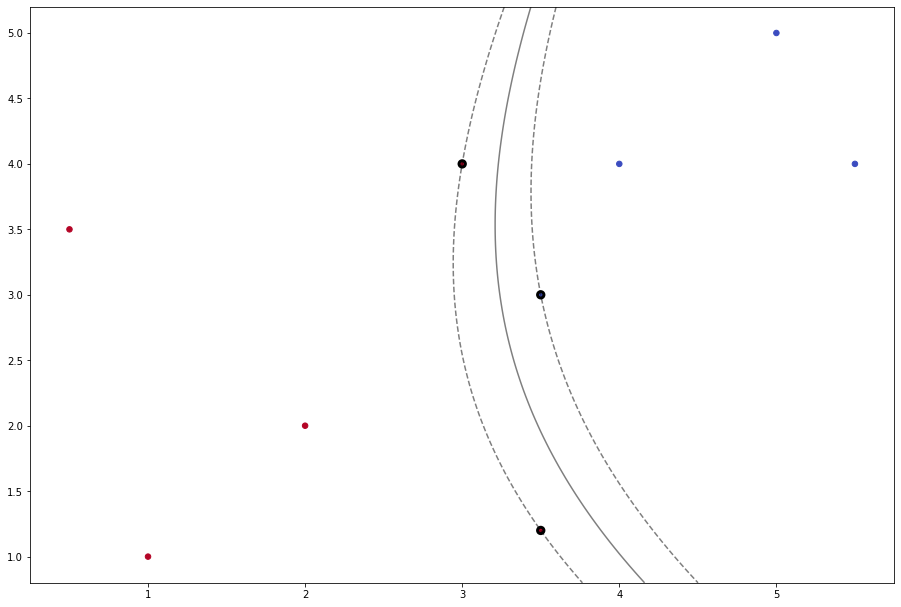

In [857]:
ax = plt.gca()
plt.scatter(X_train1.iloc[:, 0], X_train1.iloc[:, 1], c=y_train1, s=30, cmap='coolwarm')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_poly.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model_poly.support_vectors_[:, 0], model_poly.support_vectors_[:, 1], s=40,
           linewidth=3, facecolors='none', edgecolors='k')
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
plt.show()

## Another part of Question 
Implementing SVM on random data based on SupportVector.R file

Generating Random data


In [673]:
import pandas as pd
import numpy as np

In [860]:
from IPython.lib.security import random
random_data=pd.DataFrame(np.random.normal(size=(1000,2)),columns=['X','Y'])

In [861]:
print(random_data.shape)
random_data.head()

(1000, 2)


,X,Y
0,-0.242079,-0.419981
1,0.789023,-0.354632
2,0.416952,-0.333676
3,0.312618,0.615709
4,-2.364283,0.459363


In [862]:
ys=np.repeat(np.array([+1,-1]),[1000,1000],axis=0)                                        
color=np.array(['red','green'])
ys_color=np.repeat(color,[1000,1000],axis=0)

In [863]:
conditions = [                                                                            #Assigning condition 
    (random_data['X'] + random_data['Y']> 0),(random_data['X'] + random_data['Y']< 0)
]

values = [True,False]

random_data['Z'] = np.select(conditions, values)                                          # x+y>0 then 1 else 0
random_data.shape

(1000, 3)

In [864]:
X=random_data.iloc[:,:-1]
X

,X,Y
0,-0.242079,-0.419981
1,0.789023,-0.354632
2,0.416952,-0.333676
3,0.312618,0.615709
4,-2.364283,0.459363
...,...,...
995,0.402972,1.624632
996,0.692798,3.048089
997,-0.107711,-0.254376
998,-0.027660,0.623721


In [865]:
y=random_data.iloc[:,-1]
y

0      0
1      1
2      1
3      1
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: Z, Length: 1000, dtype: int64

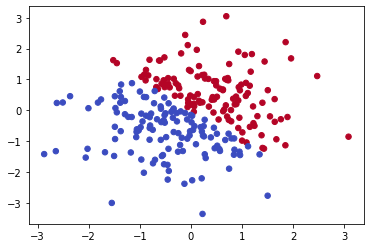

In [866]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.75,random_state=42)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train,s=30,cmap='coolwarm')

In [681]:
from sklearn.svm import SVC

In [682]:
model_linear=SVC(C=1,kernel='linear')

In [683]:
model_linear.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [684]:
y_pred_linear1=model_linear.predict(X_test)
y_pred_linear1

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [685]:
model_linear.support_vectors_

array([[-0.29001408,  0.10113639],
       [-0.9439363 ,  0.7994802 ],
       [ 0.52319858, -0.55006368],
       [-0.19652987,  0.05921676],
       [-0.44421659,  0.14249309],
       [-0.64423454,  0.48499243],
       [-0.59257173,  0.31166391],
       [ 0.76112407, -0.89624541],
       [-0.17875836,  0.14720359],
       [-0.71891157,  0.63417135],
       [-0.80051738,  0.60042734],
       [ 0.29648115, -0.32471595],
       [-0.59490165,  0.32373381],
       [ 0.56633289, -0.91409877],
       [-0.68545274,  0.41025907],
       [-0.78000361,  0.53478249],
       [ 0.20075913, -0.49922882],
       [-0.61737087,  0.53678295],
       [ 0.21608763, -0.55026752],
       [-0.55624288,  0.35499508],
       [ 0.12458596, -0.39625639],
       [-0.7834547 ,  0.54154446],
       [-0.67422734,  0.820212  ],
       [-0.11922368,  0.12071652],
       [-0.55234803,  0.74331927],
       [-0.2426554 ,  0.51868091],
       [ 1.77484803, -1.77184796],
       [ 0.07317514, -0.05924467],
       [-0.737957  ,

In [686]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred_linear1)
print("Confusion Matrix\n",cm)
accuracy=accuracy_score(y_test,y_pred_linear1)
print("Accuracy",accuracy)

Confusion Matrix
 [[349  14]
 [  2 385]]
Accuracy 0.9786666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


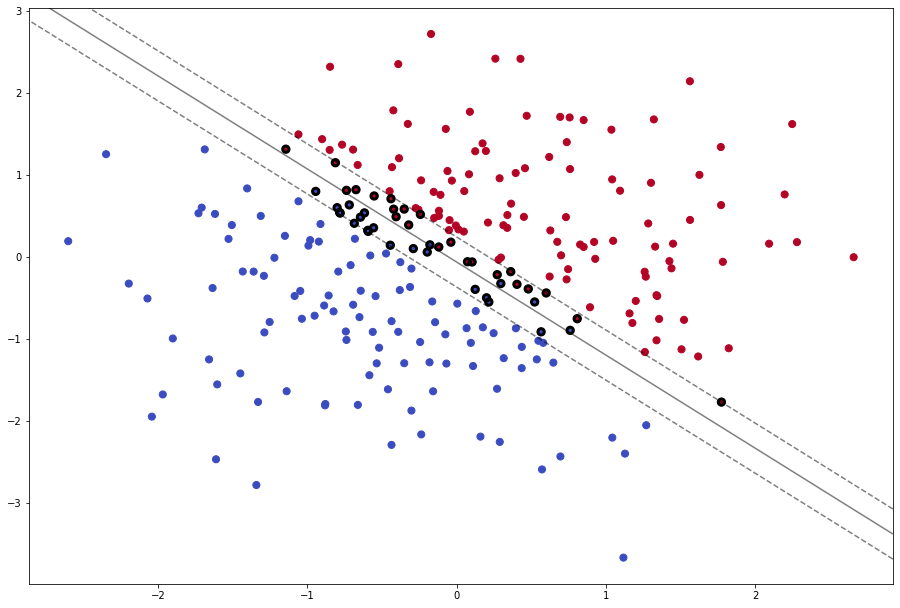

In [687]:
ax = plt.gca()
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='coolwarm')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_linear.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model_linear.support_vectors_[:, 0], model_linear.support_vectors_[:, 1], s=40,
           linewidth=3, facecolors='none', edgecolors='k')
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
plt.show()

Kernel RBF

In [688]:
model_rbf=SVC(C= 10, gamma= 0.01,kernel='rbf')
model_rbf.fit(X_train,y_train)

SVC(C=10, gamma=0.01)

In [689]:
model_rbf.support_vectors_

array([[-0.29001408,  0.10113639],
       [-0.9439363 ,  0.7994802 ],
       [ 0.52319858, -0.55006368],
       [-0.19652987,  0.05921676],
       [ 0.58020028, -1.04854422],
       [-1.40343713,  0.83550831],
       [-0.44421659,  0.14249309],
       [ 0.43693802, -1.09802442],
       [-0.64423454,  0.48499243],
       [-0.59257173,  0.31166391],
       [ 0.76112407, -0.89624541],
       [-0.37681646, -0.06430946],
       [ 0.12852417, -0.66066474],
       [-0.17875836,  0.14720359],
       [ 0.64859904, -1.29032223],
       [ 0.5483934 , -1.02377446],
       [-0.71891157,  0.63417135],
       [-0.472587  ,  0.04128564],
       [ 0.00498667, -0.57062551],
       [-1.05934299,  0.67854486],
       [-0.80051738,  0.60042734],
       [-0.30234902, -0.14251999],
       [-0.57818873,  0.01697863],
       [ 0.29648115, -0.32471595],
       [-0.91204406,  0.4011327 ],
       [-0.59490165,  0.32373381],
       [ 0.56633289, -0.91409877],
       [-0.68545274,  0.41025907],
       [-1.68740519,

In [690]:
y_pred_rbf=model_rbf.predict(X_test)
y_pred_rbf

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [691]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred_rbf)
print("Confusion Matrix\n",cm)
accuracy=accuracy_score(y_test,y_pred_rbf)
print("Accuracy",accuracy)

Confusion Matrix
 [[335  28]
 [  0 387]]
Accuracy 0.9626666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


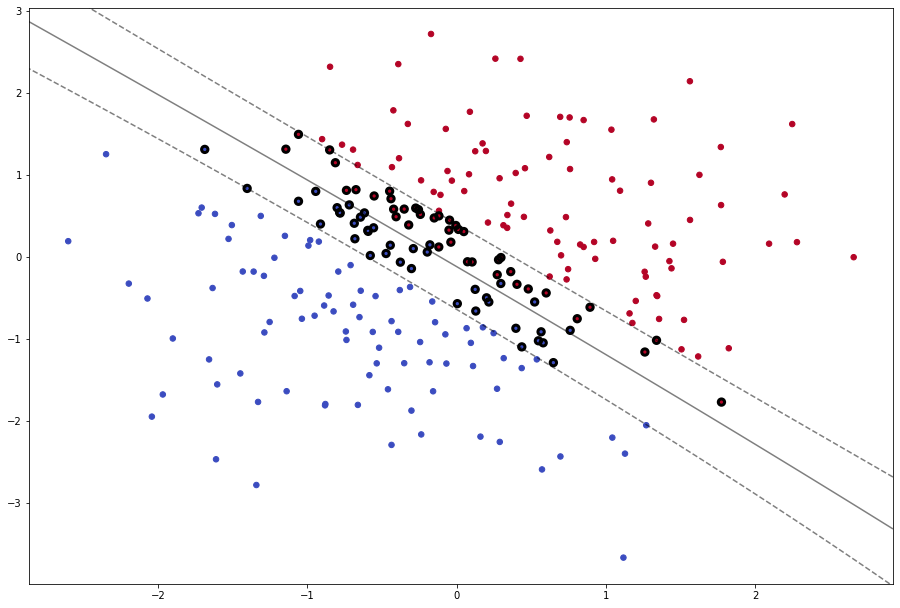

In [692]:
ax = plt.gca()
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=30, cmap='coolwarm')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_rbf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model_rbf.support_vectors_[:, 0], model_rbf.support_vectors_[:, 1], s=40,
           linewidth=3, facecolors='none', edgecolors='k')
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
plt.show()

Kernel Polynomial

Confusion Matrix
 [[363   9]
 [  4 374]]
Accuracy 0.9826666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


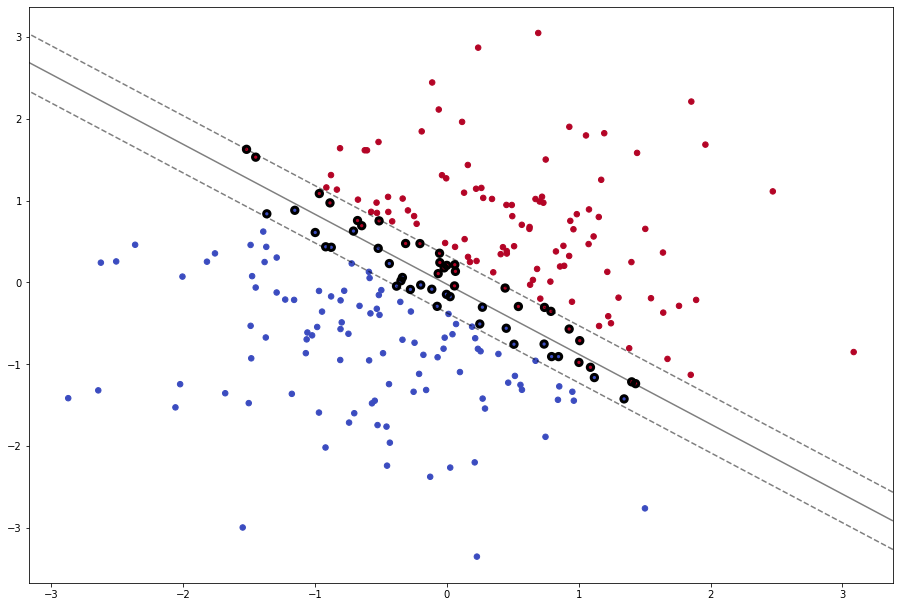

Confusion Matrix
 [[ 29 343]
 [ 30 348]]
Accuracy 0.5026666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


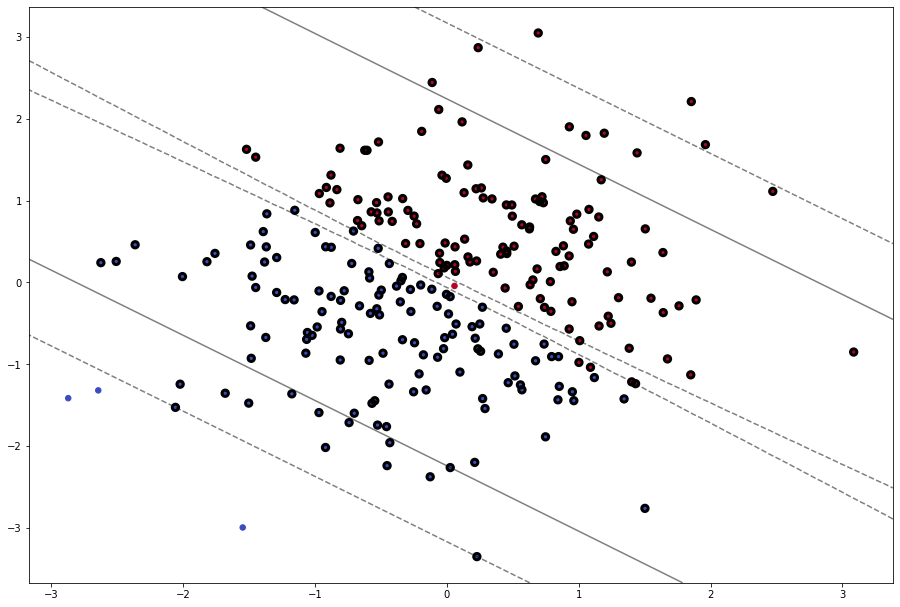

Confusion Matrix
 [[357  15]
 [  1 377]]
Accuracy 0.9786666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


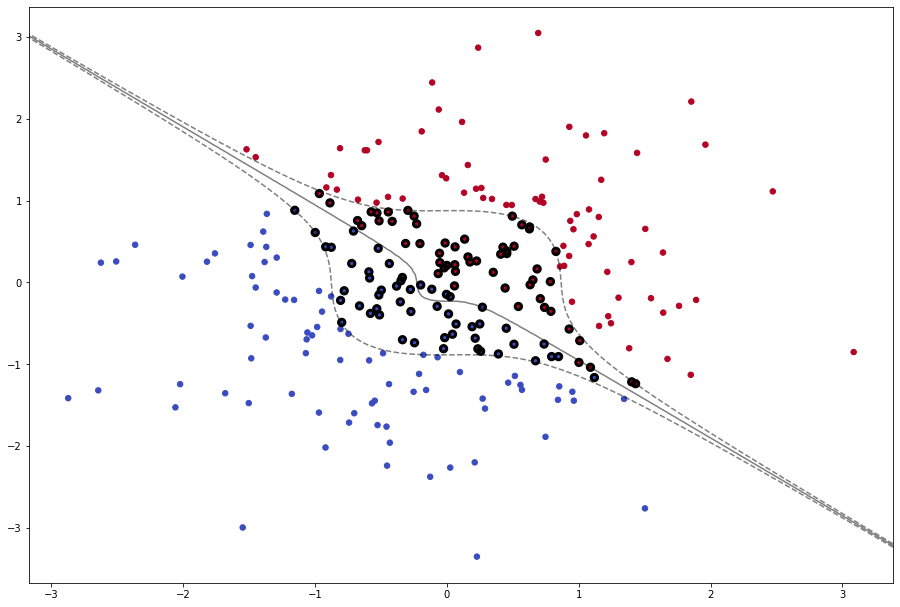

Confusion Matrix
 [[ 29 343]
 [ 31 347]]
Accuracy 0.5013333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


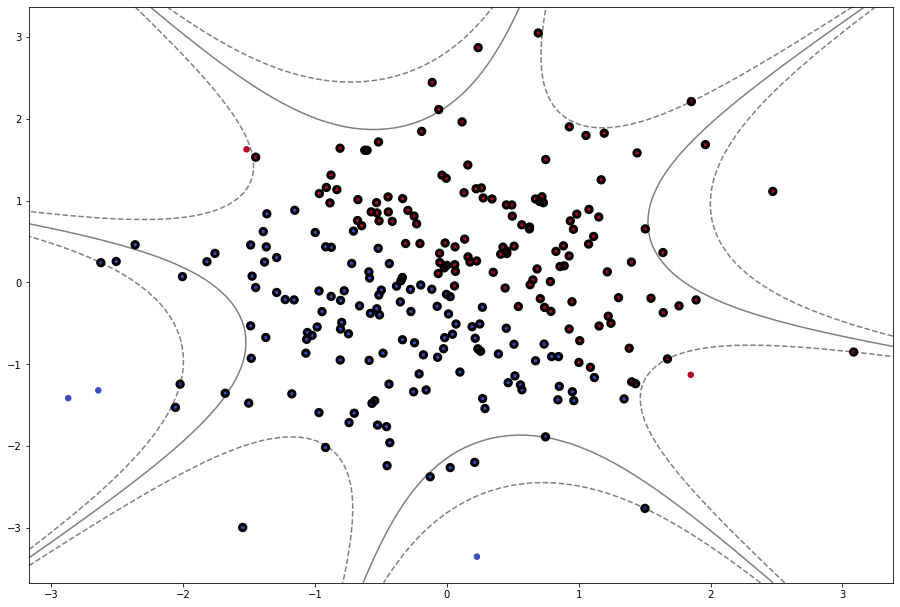

Confusion Matrix
 [[284  88]
 [  1 377]]
Accuracy 0.8813333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


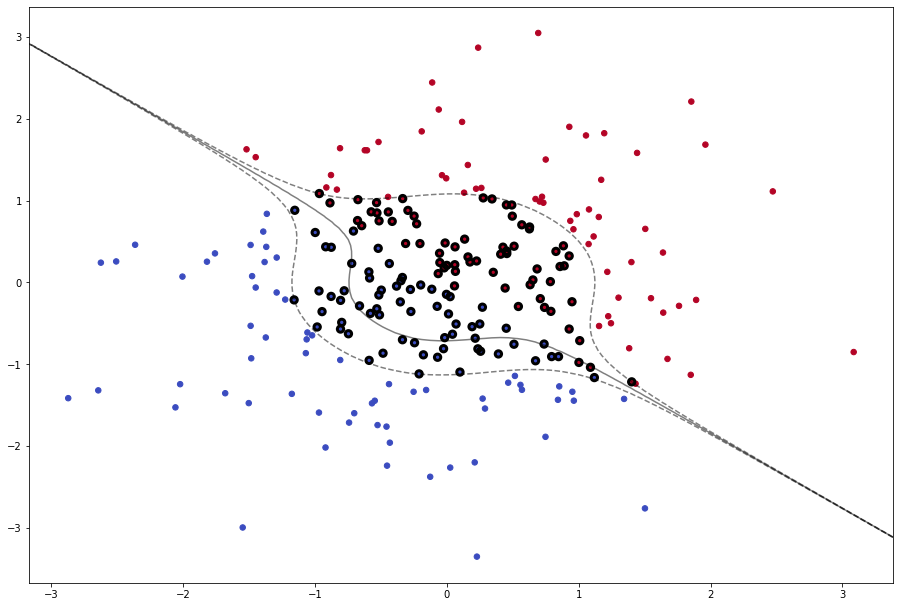

Confusion Matrix
 [[347  25]
 [343  35]]
Accuracy 0.5093333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


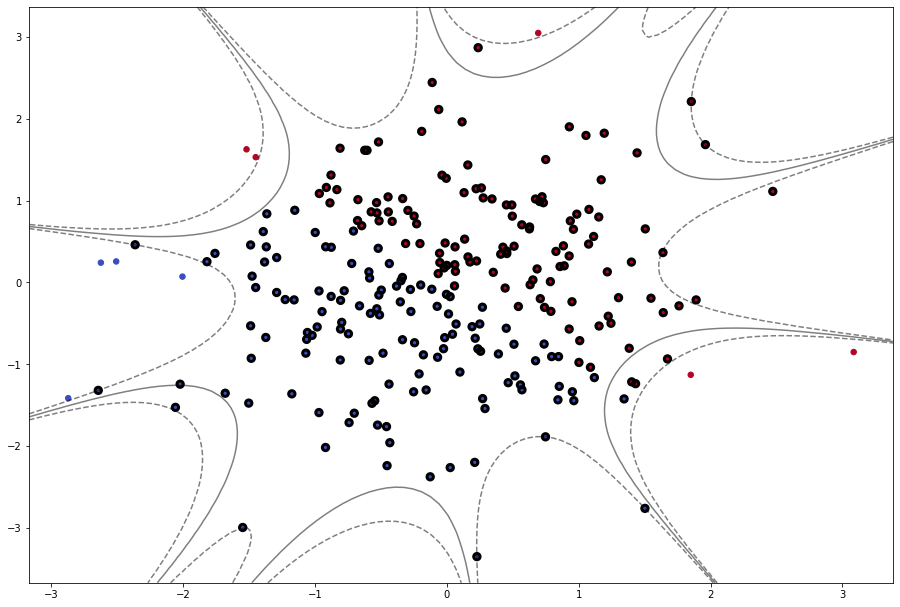

Confusion Matrix
 [[223 149]
 [  2 376]]
Accuracy 0.7986666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


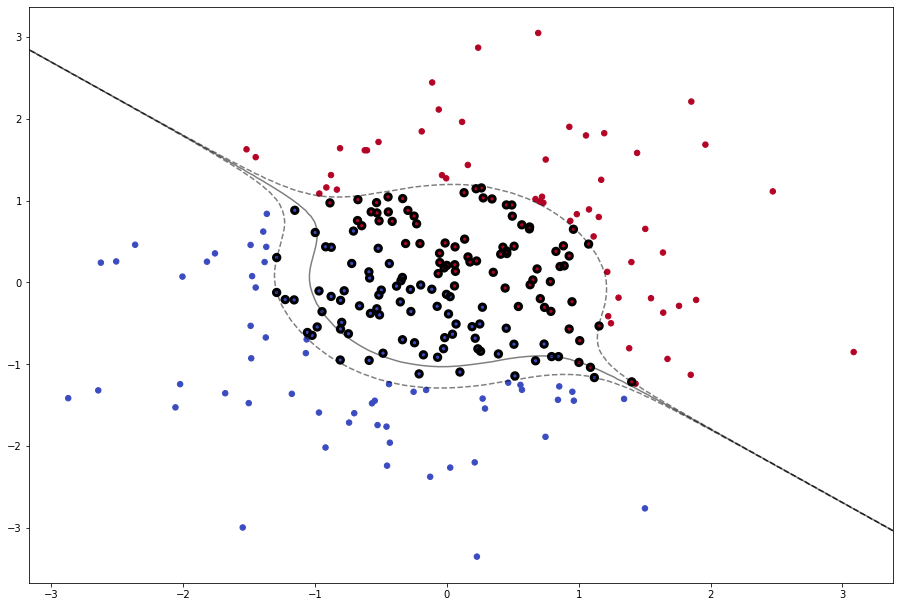

Confusion Matrix
 [[334  38]
 [330  48]]
Accuracy 0.5093333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


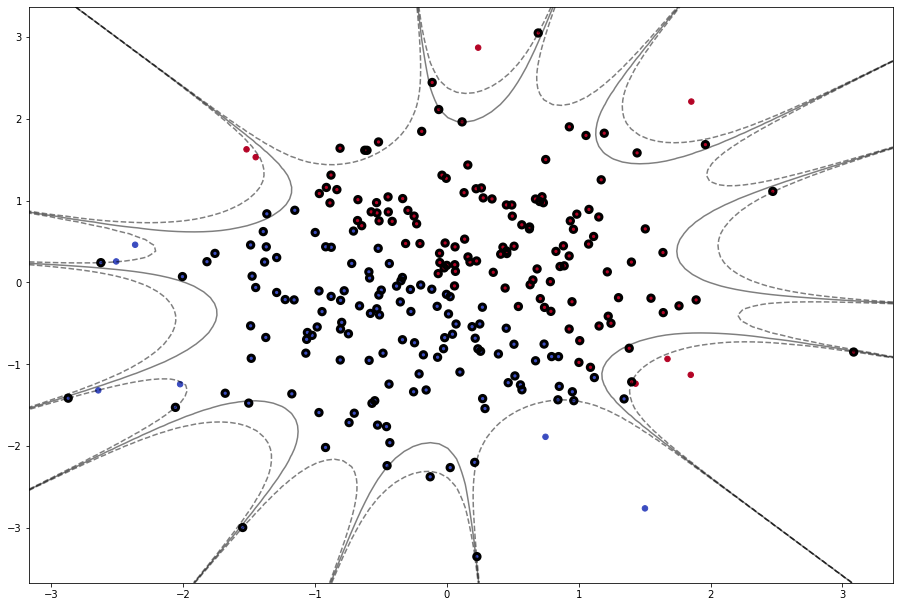

Confusion Matrix
 [[203 169]
 [  1 377]]
Accuracy 0.7733333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


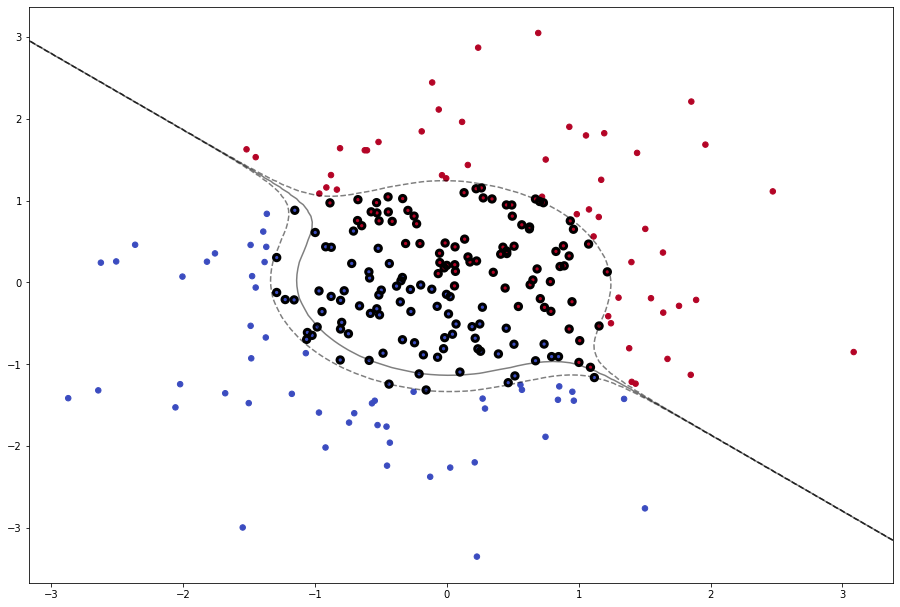

In [867]:
for i in range(1,10):
  model_poly2=SVC(C=1,kernel='poly',degree=i)
  model_poly2.fit(X_train,y_train)
  model_poly2.support_vectors_
  y_pred_poly=model_poly2.predict(X_test)
  from sklearn.metrics import accuracy_score, confusion_matrix
  cm=confusion_matrix(y_test,y_pred_poly)
  print("Confusion Matrix\n",cm)
  accuracy=accuracy_score(y_test,y_pred_poly)
  print("Accuracy",accuracy)
  ax = plt.gca()
  plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=30, cmap='coolwarm')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  xx = np.linspace(xlim[0], xlim[1], 100)
  yy = np.linspace(ylim[0], ylim[1], 100)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model_poly2.decision_function(xy).reshape(XX.shape)

  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
  linestyles=['--', '-', '--'])

  ax.scatter(model_poly2.support_vectors_[:, 0], model_poly2.support_vectors_[:, 1], s=40,
  linewidth=3, facecolors='none', edgecolors='k')
  plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
  plt.show()

In [873]:
model_poly2=SVC(kernel='poly',degree=1)                                           #SVC with kernel=polynomial & degree=1
model_poly2.fit(X_train,y_train)
model_poly3=SVC(kernel='poly',degree=3)   
model_poly3.fit(X_train,y_train)                                                  #SVC with kernel=polynomial & degree=3

SVC(kernel='poly')

In [869]:
model_poly2.support_vectors_

array([[ 4.50278670e-01, -5.61259087e-01],
       [ 7.94428789e-01, -9.07647207e-01],
       [-1.98558060e-01, -3.22538150e-02],
       [-9.19174979e-01,  4.34430897e-01],
       [-2.76639576e-01, -8.70886400e-02],
       [-1.15344511e+00,  8.80694552e-01],
       [-3.48369863e-01,  1.90494336e-02],
       [ 8.46737727e-01, -9.07924478e-01],
       [ 2.49676976e-01, -5.09132400e-01],
       [-9.98515803e-01,  6.09302520e-01],
       [-1.36555459e+00,  8.37454090e-01],
       [-7.37525259e-02, -2.93451184e-01],
       [-3.81803531e-01, -4.63863040e-02],
       [-3.25517188e-03, -1.46842401e-01],
       [ 1.34397286e+00, -1.42497437e+00],
       [-7.08443987e-01,  6.26868785e-01],
       [ 2.48343852e-02, -1.74834575e-01],
       [-1.14347535e-01, -8.43436487e-02],
       [ 2.69419652e-01, -3.04211226e-01],
       [-3.37268486e-01,  5.95536085e-02],
       [-5.20877145e-01,  4.15639908e-01],
       [ 1.11854608e+00, -1.16416277e+00],
       [-4.36374326e-01,  2.29583105e-01],
       [ 7.

In [874]:
y_pred_poly=model_poly2.predict(X_test)                                           #predicting with model having degree 1
y_pred_poly2=model_poly3.predict(X_test)                                          #predicting with model having degree 3

Confusion Matrix & accuracy score of model having degree 1

In [871]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred_poly)
print("Confusion Matrix\n",cm)
accuracy=accuracy_score(y_test,y_pred_poly)
print("Accuracy",accuracy)

Confusion Matrix
 [[363   9]
 [  4 374]]
Accuracy 0.9826666666666667


Confusion Matrix & accuracy score of model having degree 3

In [875]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred_poly2)
print("Confusion Matrix\n",cm)
accuracy=accuracy_score(y_test,y_pred_poly2)
print("Accuracy",accuracy)

Confusion Matrix
 [[357  15]
 [  1 377]]
Accuracy 0.9786666666666667


Visualizing the result of model with degree 1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


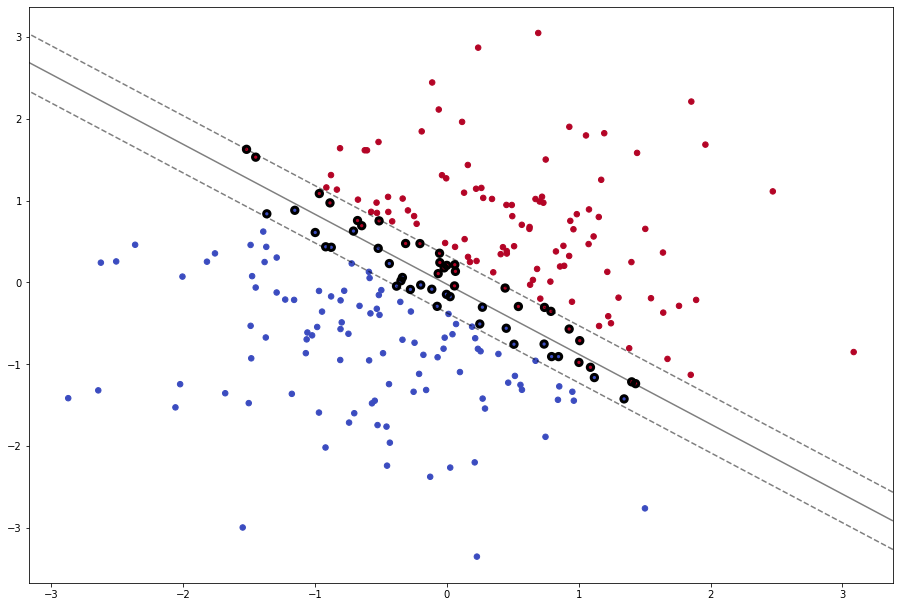

In [872]:
ax = plt.gca()
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=30, cmap='coolwarm')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_poly2.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model_poly2.support_vectors_[:, 0], model_poly2.support_vectors_[:, 1], s=40,
           linewidth=3, facecolors='none', edgecolors='k')
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
plt.show()

Visualizing the result of model with degree 3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


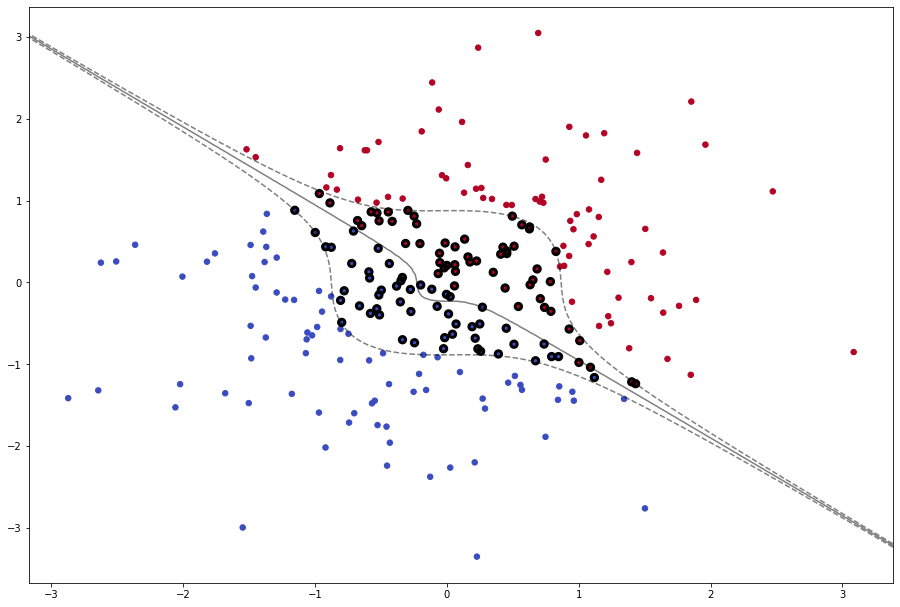

In [877]:
ax = plt.gca()
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=30, cmap='coolwarm')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_poly3.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model_poly3.support_vectors_[:, 0], model_poly3.support_vectors_[:, 1], s=40,
           linewidth=3, facecolors='none', edgecolors='k')
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=2.0)
plt.show()